<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Proyecto_Series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

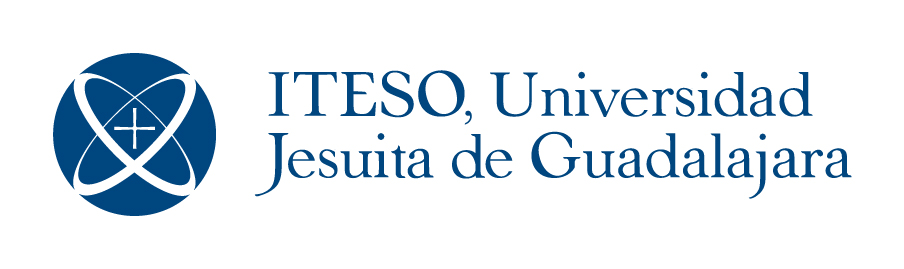

# **SERIES DE TIEMPO**

**Michelle Alejandra Gómez López**  
           
 Fecha: 4 de Septiembre de 2024

 Semestre : Otoño 2024

***Índice***


*   *Introducción*
*   *Objetivo*
*   *Definición del problema*
*   *Descarga y preparación de datos*
*   *Análisis exploratorio*
*   *Estimación a criterio*  
*   *Transformaciones y ajustes*
*   *Modelo*
*   *Evaluación*
*   *Comparación de modelos*
*   *Pronósticos*
*   *Conclusión*
*   *Referencias*

















***Introducción***

Una **serie de tiempo** es una secuencia de datos u observaciones medidos en determinados momentos, en intervalos iguales o desiguales, y ordenados cronológicamente.

  El **análisis de series de tiempo** se refiere al proceso de analizar los datos disponibles para descubrir el patrón o la tendencia en los datos. Permite extraer y modelar las relaciones entre datos a lo largo del tiempo, sea extrapolando (hacia futuro) o interpolando (hacia el pasado) el comportamiento de datos no observados.



Rojas-Jimenez, K. (s. f.). Capítulo 8 Análisis de Series de Tiempo | Ciencia de Datos para Ciencias Naturales. https://bookdown.org/keilor_rojas/CienciaDatos/an%C3%A1lisis-de-series-de-tiempo.html#escogencia-y-ajuste-del-modelo
______________________________________________

***Descripción del Gas Natural (NG=F)***






***Define que pronosticar***




***Por que es importante analizar y pronosticar en el contexto social***





***Relevancia con México***




_________________________________

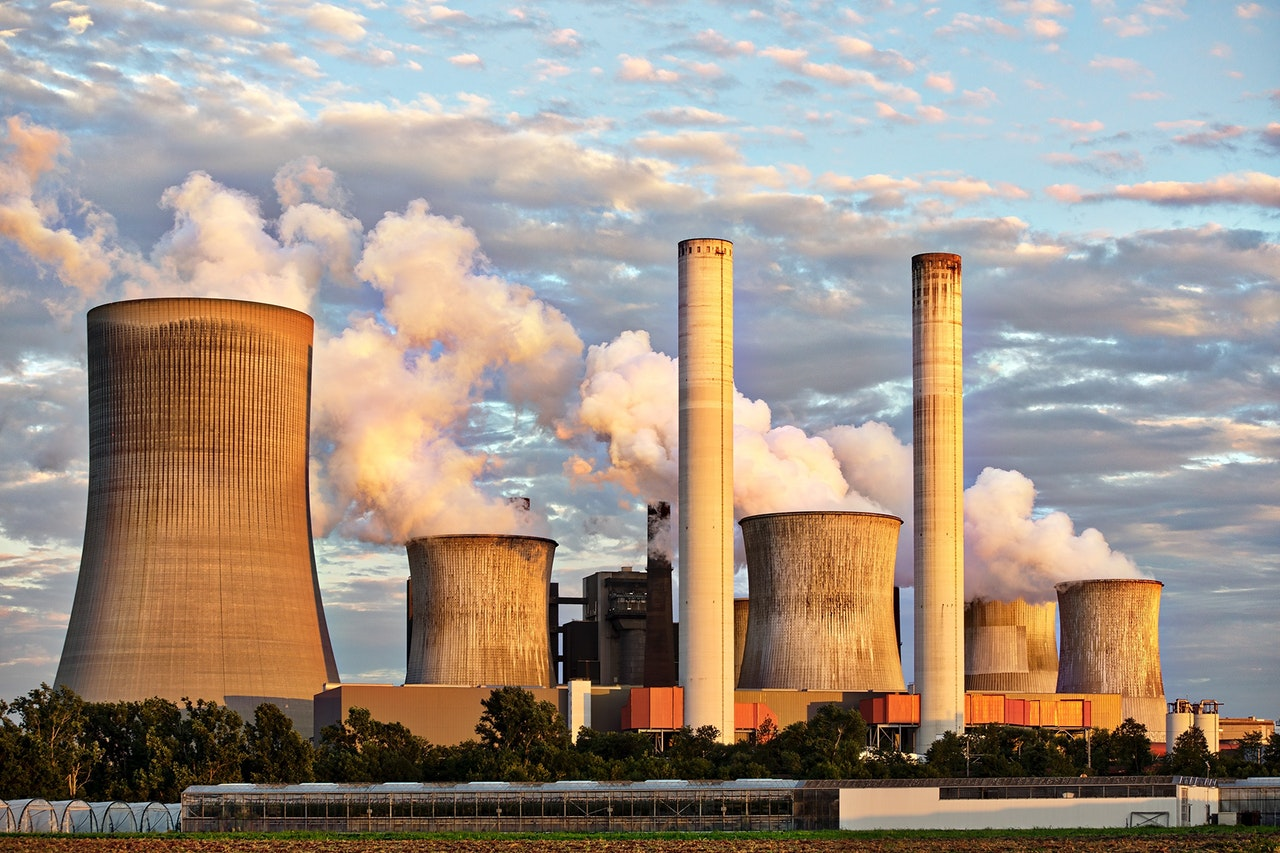

## **Natural Gas**

*Descarga y preparación de datos*
_________________________________


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU

In [7]:
dataG = 'NG=F'
ticker = yf.Ticker(dataG)
hist = ticker.history(start= '2011-01-01', end= '2023-12-01', interval='1mo')['Close']
hist.index = hist.index.strftime('%Y-%m-%d')
hist.index = pd.to_datetime(hist.index)

hist

,Close
Date,
2011-01-01,4.420
2011-02-01,4.037
2011-03-01,4.389
2011-04-01,4.698
2011-06-01,4.374
...,...
2023-06-01,2.798
2023-07-01,2.634
2023-08-01,2.768


In [10]:
type(hist)

pandas.core.series.Series

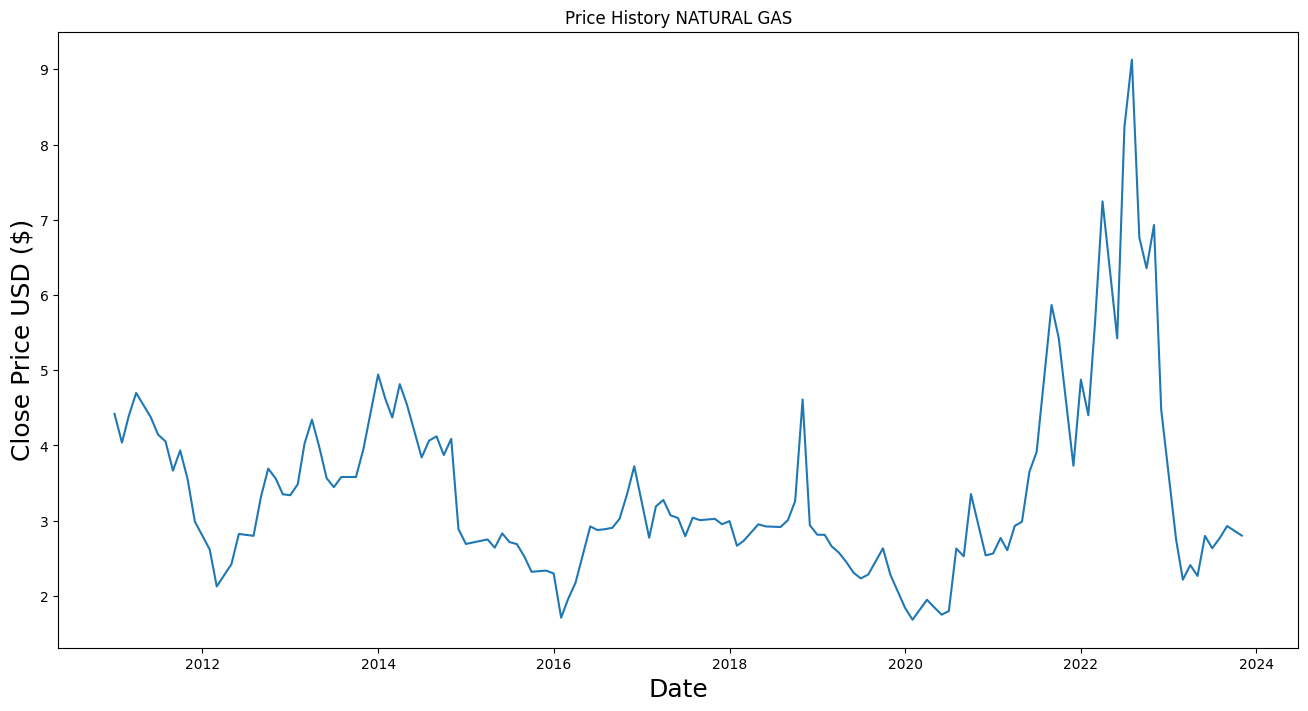

In [9]:
plt.figure(figsize=(16,8))
plt.title('Price History NATURAL GAS')
plt.plot(hist)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [13]:
hist.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01',
               '2011-10-01', '2011-11-01',
               ...
               '2022-12-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-11-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)

In [14]:
hist.head()

,Close
Date,
2011-01-01,4.420
2011-02-01,4.037
2011-03-01,4.389
2011-04-01,4.698
2011-06-01,4.374


Al separar los datos entre entrenamiento y prueba se puede:

• **Evaluar la generalización:** Permite evaluar cómo se desempeña el modelo en datos no vistos, lo que ayuda a medir su capacidad de generalización.

• **Prevenir el sobreajuste:** Ayuda a identificar si el modelo está sobreajustado a los datos de entrenamiento, lo cual podría llevar a un mal rendimiento en datos reales.

• **Optimizar el modelo:** Permite ajustar los hiperparámetros y realizar selecciones de características de manera más efectiva

In [15]:
training_mask = hist.index > '2024-01-01'
test = hist[training_mask]
train = hist[~training_mask]

Text(0.5, 1.0, 'Gas Natural 2012-2024')

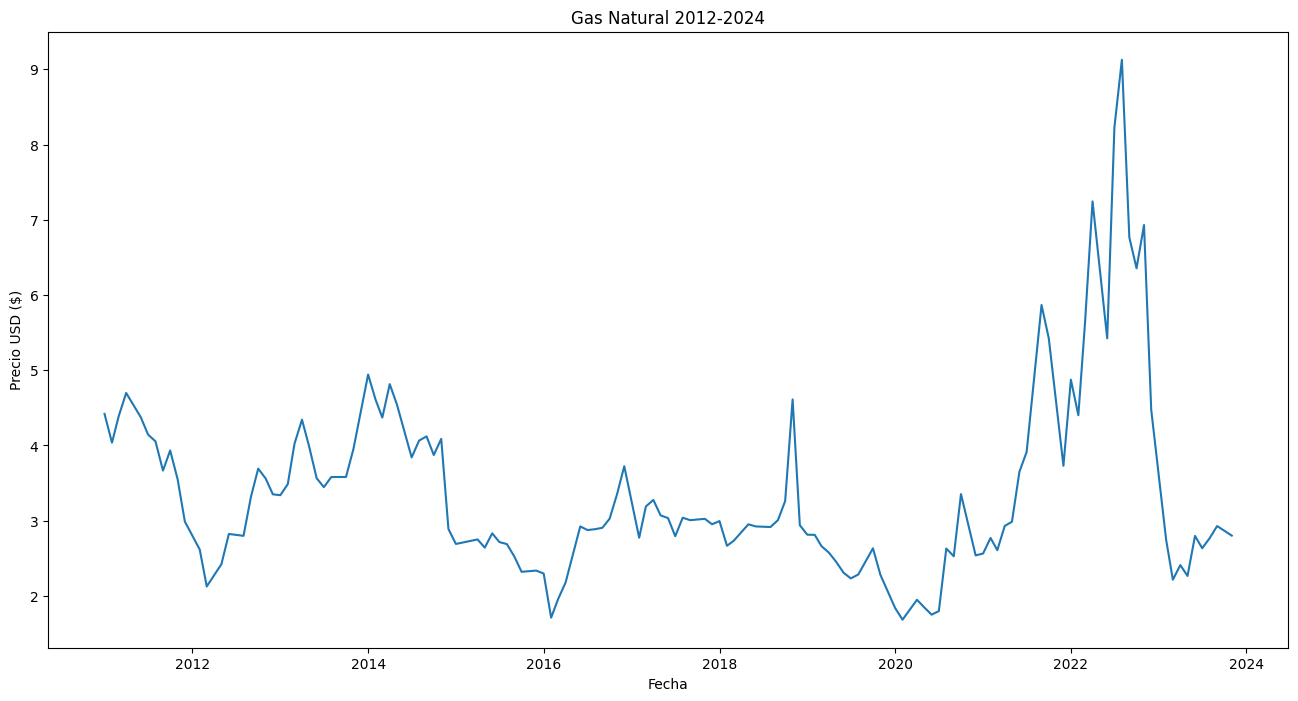

In [25]:
plt.figure(figsize=(16,8))
sns.lineplot(data = hist)
plt.ylabel("Precio USD ($)")
plt.xlabel("Fecha")
plt.title("Gas Natural 2012-2024")


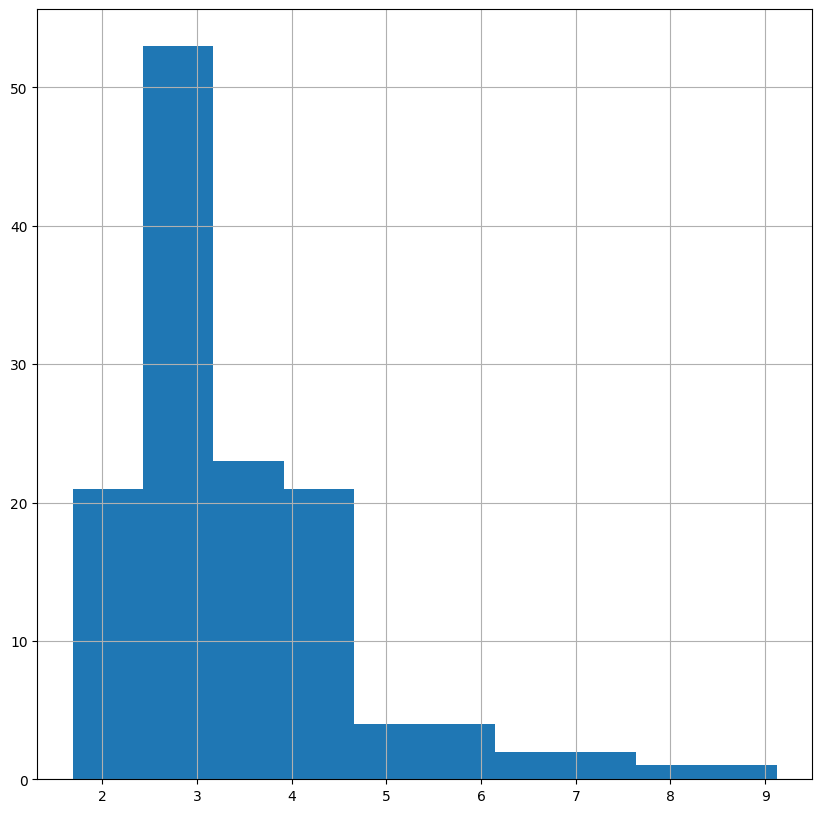

In [24]:
hist.hist(figsize=(10, 10))
plt.show()

<Axes: ylabel='Density'>

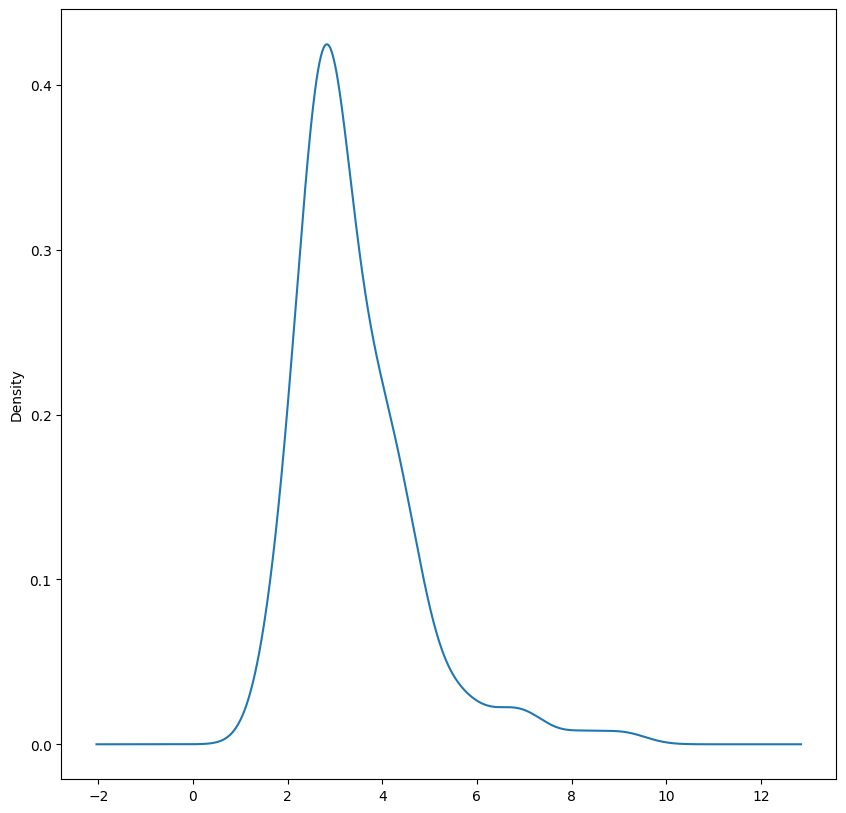

In [27]:
plt.figure(figsize=(10,10))
hist.plot.density()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot


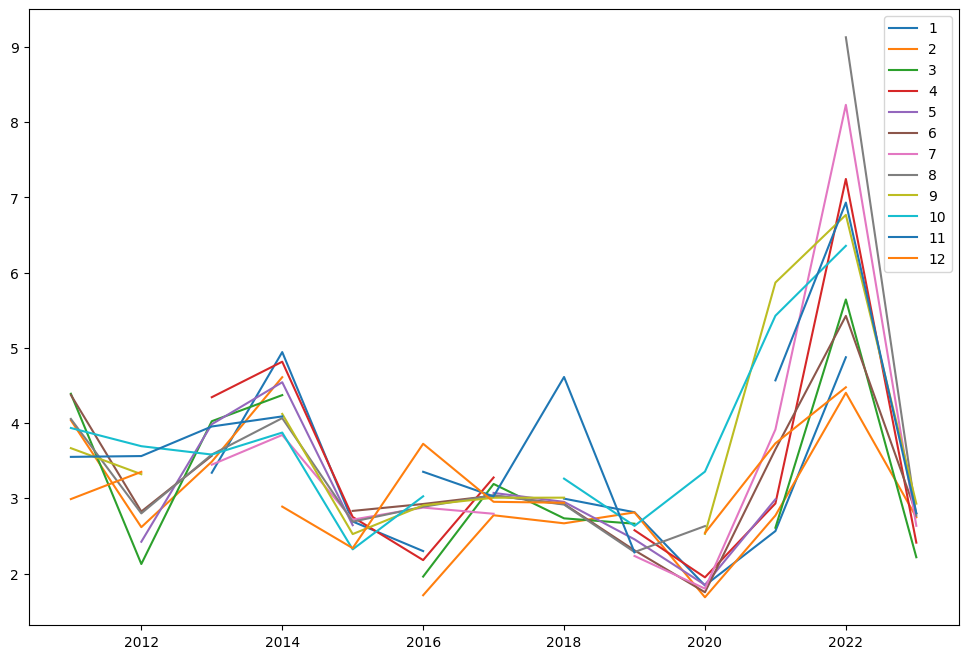

In [49]:
piv_index = getattr(hist.index, 'year')
piv_season = getattr(hist.index, 'month')

# Calculate the correct shape based on unique years and months
num_years = len(pd.unique(piv_index))
num_months = len(pd.unique(piv_season))

# Calculate the expected size of the reshaped array
expected_size = num_years * num_months

# Truncate or pad the data to match the expected size
if len(hist) < expected_size:
    # Pad with NaN if data is shorter than expected
    padding_size = expected_size - len(hist)
    padding = np.full((padding_size, hist.shape[1]), np.nan)
    data_to_reshape = np.concatenate([hist.values, padding])
elif len(hist) > expected_size:
    # Truncate if data is longer than expected
    data_to_reshape = hist.values[:expected_size]
else:
    data_to_reshape = hist.values

# Reshape the data using the calculated shape
reshaped_data = np.reshape(data_to_reshape, (num_years, num_months))

piv = pd.DataFrame(index=pd.unique(piv_index), columns=pd.unique(piv_season), data=reshaped_data)
piv.plot(figsize=(12, 8))
plt.legend(pd.unique(piv_season))

In [50]:
piv.head()

,1,2,3,4,5,6,7,8,9,10,11,12
2011,4.420,4.037,4.389,4.698,NaN,4.374,4.145,4.054,3.666,3.934,3.550,2.989
2012,NaN,2.616,2.126,NaN,2.422,2.824,NaN,2.799,3.320,3.692,3.561,3.351
2013,3.339,3.486,4.024,4.343,3.984,3.565,3.446,3.581,NaN,3.581,3.954,NaN
2014,4.943,4.609,4.371,4.815,4.542,NaN,3.841,4.065,4.121,3.873,4.088,2.889
2015,2.691,NaN,NaN,2.751,2.642,2.832,2.716,2.689,2.524,2.321,NaN,2.337


In [53]:
piv.shape

(12, 13)

([], [])

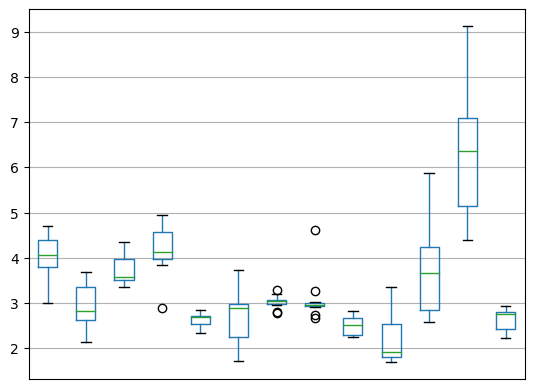

In [54]:

piv.boxplot()
plt.xticks([])


<Axes: xlabel='Date'>

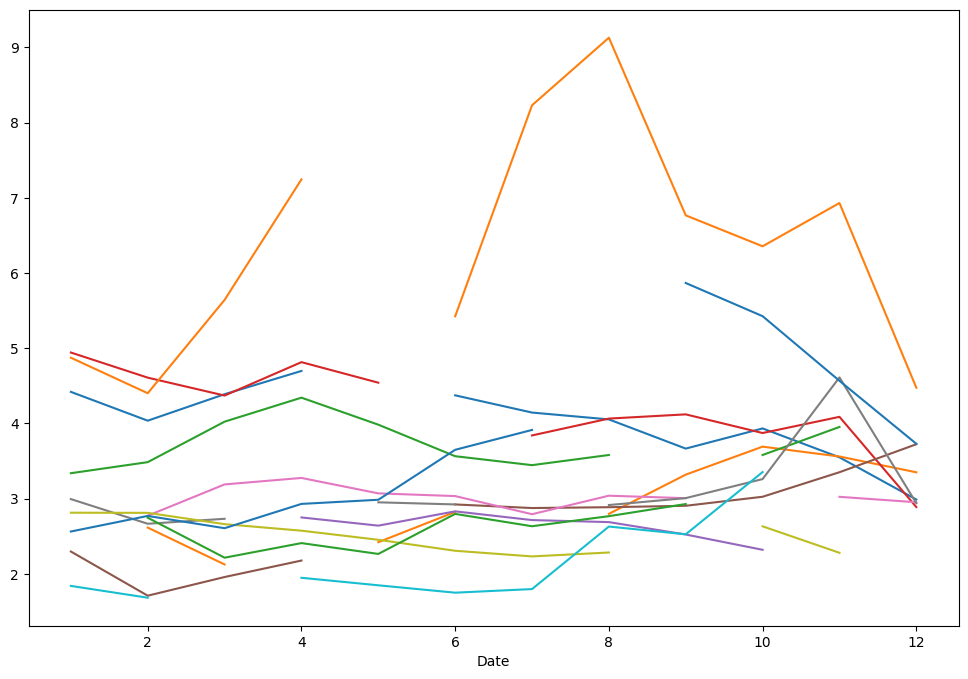

In [51]:
piv = pd.pivot_table(hist, index=piv_season, columns=piv_index)
piv.plot(figsize=(12,8), legend = False)

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


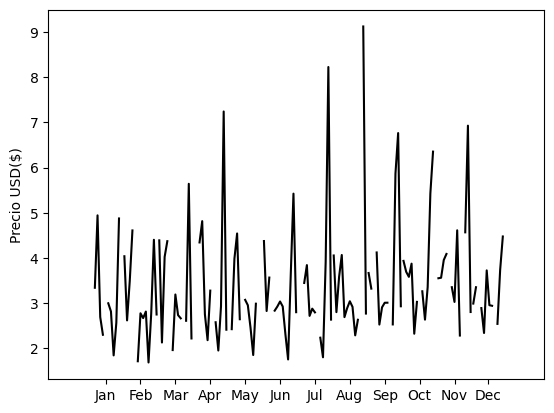

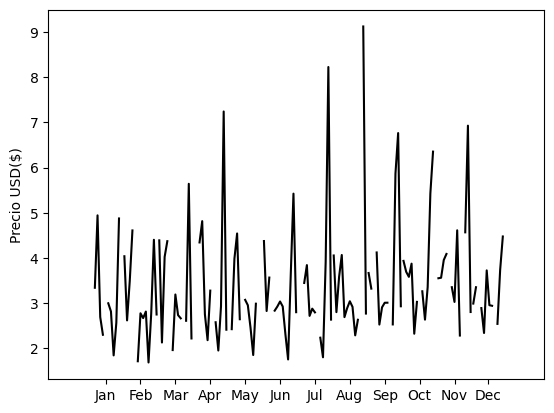

In [52]:
month_plot(hist, ylabel='Precio USD($)')

array([[<Axes: xlabel='Values', ylabel='Values'>]], dtype=object)

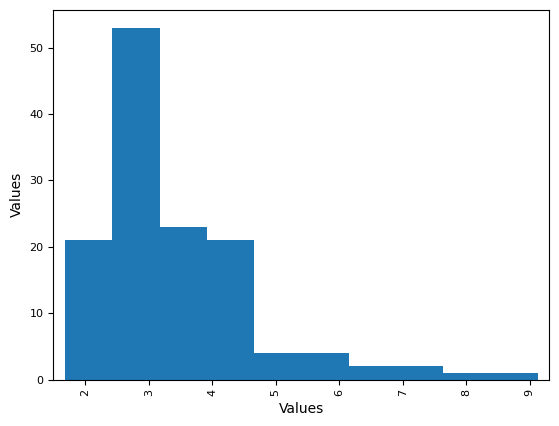

In [55]:
pd.plotting.scatter_matrix(hist)

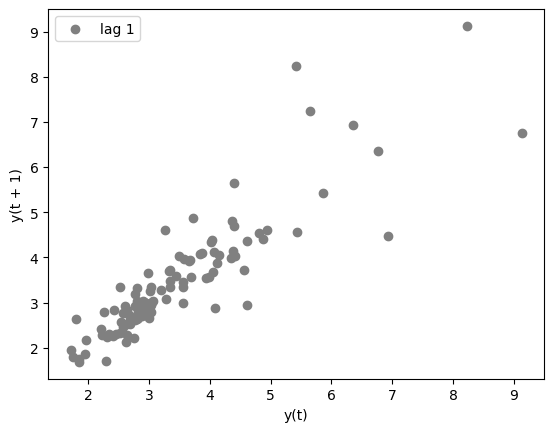

In [63]:
from pandas.plotting import lag_plot
lag_plot(hist, lag=1, c=['grey'], label='lag 1')
plt.legend()

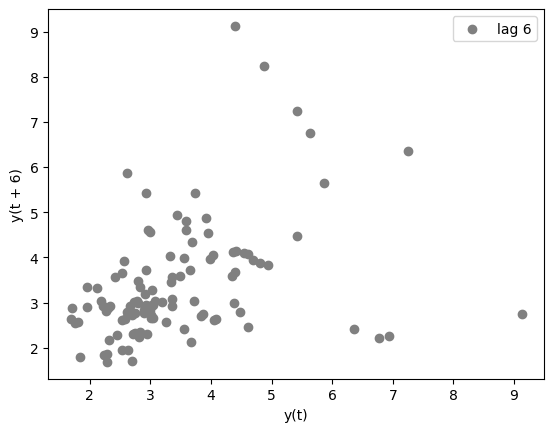

In [67]:
lag_plot(hist, lag=6, c=['grey'], label='lag 6')
plt.legend()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

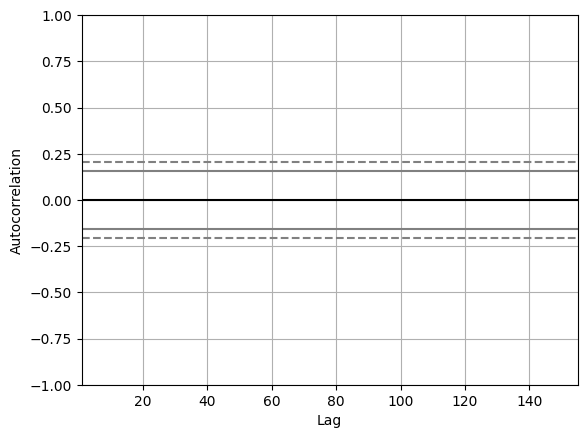

In [69]:
pd.plotting.autocorrelation_plot(hist)